模型的聚类和评价

In [1]:
import pandas as pd
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

In [16]:
data = pd.read_csv('online_shoppers_intention.csv')

# 数据预处理
# 丢弃列【Revenue】
data.drop(['Revenue'], axis=1, inplace=True)
data.dropna(inplace=True)
data = pd.get_dummies(data)

data.head()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,...,0,0,0,0,0,0,0,0,0,1


c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 760, in _score
    scores = scorer(estimator, X_test)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:771: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 760, in _score
    scores = scorer(estimator, X_test)

{'n_clusters': 2}


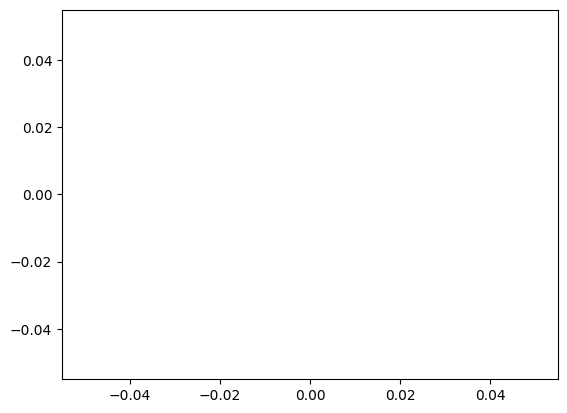

In [15]:
from sklearn.model_selection import GridSearchCV

param_grid=  {
    "n_clusters":range(2, 10),
}

# 使用KMeans进行聚类分析
kmeans = KMeans()
grid_search = GridSearchCV(kmeans, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(data)
print(grid_search.best_params_)





0.7814617053429734


c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\Dustella\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


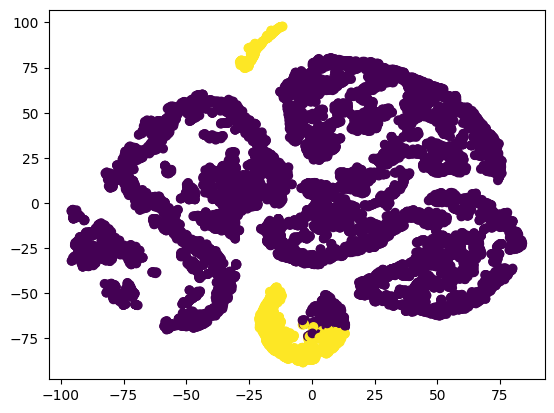

In [20]:
import matplotlib.pyplot as plt
# 使用TSNE进行降维
from sklearn.manifold import TSNE

# 使用KMeans进行聚类分析,n_clusters=2

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
# 评价聚类效果
print(silhouette_score(data, kmeans.labels_))
kmeans_labels = kmeans.labels_

tsne = TSNE()
tsne_data = tsne.fit_transform(data)
tsne_data = pd.DataFrame(tsne_data, columns=['x', 'y'])
tsne_data['cluster'] = kmeans_labels

plt.scatter(tsne_data['x'], tsne_data['y'], c=tsne_data['cluster'])
plt.show()


In [8]:
# 使用DBSCAN进行聚类分析
dbscan = DBSCAN(eps=3, min_samples=2)
dbscan.fit(data)
dbscan_labels = dbscan.labels_
dbscan_score = silhouette_score(data, dbscan_labels)

dbscan_labels
dbscan_score

-0.6804752375305139

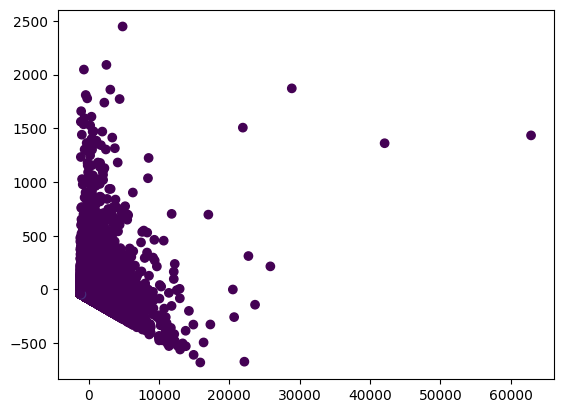

In [19]:
# 对dbscan可视化
tsne = TSNE()
tsne_data = tsne.fit_transform(data)
tsne_data = pd.DataFrame(tsne_data, columns=['x', 'y'])
tsne_data['cluster'] = dbscan_labels

plt.scatter(tsne_data['x'], tsne_data['y'], c=tsne_data['cluster'])
plt.show()